In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random

In [2]:
dpath="V:\Pranali\Assignment 5\Assignment 5"
logo_class=["new","old"]

In [6]:
# 1. Load the two folders USF old and USF new to the environment
training_data = []

def create_training_data():
    for category in logo_class:
        path = os.path.join(dpath, category)
        class_num = logo_class.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img))
# 3. Resize the images to one size for model input                
                new_array = cv2.resize(img_array, (212, 264))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [7]:
create_training_data()

In [8]:
# 2. Create a label for each folder(USF old as old) and (USF new as new)
random.shuffle(training_data)

X,y = [],[] 
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X)


In [9]:
# 5. Normalize the data
X = X/255.0

In [10]:
# 4. Create a stratified split based on the labels(80:20 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [12]:
j,k=0,0

for i in y_train:
    if (i == 0):
        j=j+1
        
for i in y_test:
    if (i == 0):
        k=k+1


In [13]:
X_train = X_train/255.0
X_test = X_test/255.0

In [14]:
#Changing the y lists to arrays.
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
# 6. Reshape the input data to a tensor(4d) for CNN

In [15]:
X_train.shape

(160, 264, 212, 3)

In [16]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [18]:
# 7. Build a CNN Classifier model and improve it by tuning the hyper parameters

model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (4,4), input_shape = (264, 212,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(64, (4,4)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(64, (4,4)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(512))
model.add(Activation("relu"))

# The output layer with 2 neurons, for 2 classes
model.add(Dense(2))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X_train, y_train, batch_size=32, epochs=10)


Train on 160 samples
Epoch 1/10
160/160 [==============================] - 7s 44ms/sample - loss: 0.6943 - accuracy: 0.4938
Epoch 2/10
160/160 [==============================] - 6s 40ms/sample - loss: 0.6933 - accuracy: 0.5000
Epoch 3/10
160/160 [==============================] - 6s 40ms/sample - loss: 0.6826 - accuracy: 0.5375
Epoch 4/10
160/160 [==============================] - 6s 40ms/sample - loss: 0.6382 - accuracy: 0.6187
Epoch 5/10
160/160 [==============================] - 6s 40ms/sample - loss: 0.6039 - accuracy: 0.7937
Epoch 6/10
160/160 [==============================] - 6s 40ms/sample - loss: 0.5618 - accuracy: 0.7812
Epoch 7/10
160/160 [==============================] - 7s 41ms/sample - loss: 0.5178 - accuracy: 0.8375
Epoch 8/10
160/160 [==============================] - 6s 41ms/sample - loss: 0.5096 - accuracy: 0.7750
Epoch 9/10
160/160 [==============================] - 6s 38ms/sample - loss: 0.4705 - accuracy: 0.8250
Epoch 10/10
160/160 [==============================]

In [ ]:
"""
8. Explain what every layer does why was it constructed the way it is?

Hidden layers allow for the function of a neural network to be broken down into specific transformations of the data. 
Each hidden layer function is specialized to produce a defined output.
Kernel is used for feature detection
As we keep applying conv layers, the size of the volume will decrease faster than we would like. 
In the early layers of our network, we want to preserve as much information about 
the original input volume so that we can extract those low level features.
"""

In [16]:
# 9. Evaluate CNN using F1 score values and accuracy(only for the best model)
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(test_X)


ypred=[]

for i in y_pred:
    if i[0]>i[1]:
        ypred.append(0)
    else:
        ypred.append(1)
ypred=np.array(ypred)

print(confusion_matrix(test_y,ypred))
print(classification_report(test_y,ypred))

[[20  0]
 [20  0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        20
           1       0.00      0.00      0.00        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



C:\Users\vidhi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


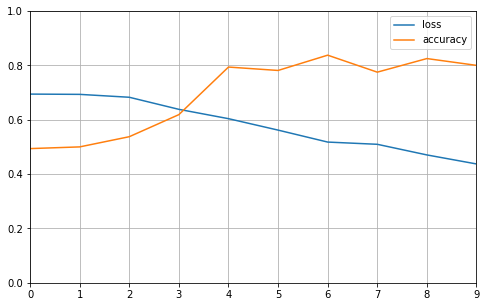

In [21]:
# 10. Plot the learning curves for Model accuracy and Model loss
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()